## Two Categories
We want to create a model that will predict a color of the marker and a marker type.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data.head()

,x,y,color,marker
0,-0.765775,1.006452,red,^
1,0.229016,0.094320,red,^
2,0.189987,1.589141,red,^
3,0.580085,0.520488,red,^
4,0.292287,0.317852,red,^


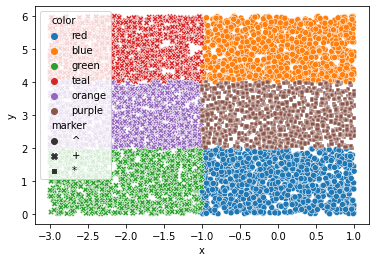

In [4]:
sns.scatterplot(data=train_data, x='x', y='y', style='marker', hue='color')
plt.show()

In [20]:
sorted(train_data.marker.unique()), sorted(train_data.color.unique())

(['*', '+', '^'], ['blue', 'green', 'orange', 'purple', 'red', 'teal'])

In [6]:
one_hot_color_train = pd.get_dummies(train_data.color).values
one_hot_marker_train = pd.get_dummies(train_data.marker).values
one_hot_color_test = pd.get_dummies(test_data.color).values
one_hot_marker_test = pd.get_dummies(test_data.marker).values
labels_train = np.concatenate((one_hot_color_train, one_hot_marker_train), axis=1)
labels_test = np.concatenate((one_hot_color_test, one_hot_marker_test), axis=1)

In [7]:
X_train_ = np.column_stack((train_data.x, train_data.y))
X_test_ = np.column_stack((test_data.x, test_data.y))
X_train_[:2]

array([[-0.76577519,  1.00645248],
       [ 0.22901613,  0.09432024]])

In [8]:
train = np.column_stack((X_train_, labels_train))
test = np.column_stack((X_test_, labels_test))

In [9]:
np.random.shuffle(train)
np.random.shuffle(test)

In [10]:
X_train = train[:, :2]
y_train = train[:, 2:]
X_test = test[:, :2]
y_test = test[:, 2:]

### Model Creation

In [11]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(2, ), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(9, activation='sigmoid')
])

### Compiling the Model

In [12]:
model.compile(
    optimizer = 'adam',
    metrics = ["accuracy"],
    loss = keras.losses.BinaryCrossentropy(from_logits=True)
)

### Fitting the Model

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=5)

Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.4126 - accuracy: 0.0420
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1591 - accuracy: 0.2428
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.2377
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0741 - accuracy: 0.2649
Epoch 5/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0568 - accuracy: 0.2903
Epoch 6/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0493 - accuracy: 0.3127
Epoch 7/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0437 - accuracy: 0.2955
Epoch 8/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0390 - accuracy: 0.2942
Epoch 9/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0345 - accuracy: 0.2956
Epoch 10/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.032

### Model Evaluation

In [16]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.1650


[0.020796816796064377, 0.16500000655651093]

### Making predictions

In [21]:
np.round(model.predict([[-1.5, 1]]))

array([[0., 1., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

> The **Neural Network(NN) model** is saying it is a `green` marker of type `+`